<a href="https://colab.research.google.com/github/AI4Finance-LLC/ElegantRL/blob/master/Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set up ElegantRL**

In [1]:
import os
os.chdir('/content')
!git clone https://github.com/AI4Finance-LLC/ElegantRL.git
os.chdir('/content/ElegantRL')
!ls

Cloning into 'ElegantRL'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2315 (delta 13), reused 7 (delta 2), pack-reused 2284
Receiving objects: 100% (2315/2315), 35.63 MiB | 34.52 MiB/s, done.
Resolving deltas: 100% (1528/1528), done.
elegantrl		  Examples.ipynb	 LICENSE	   setup.py
elegantrl2		  figs			 README.md
ElegantRL_examples.ipynb  FinanceMultiStock.npy  requirements.txt


# **Import libary**

In [3]:
from elegantrl2.main import *
import gym
from elegantrl2.env import decorate_env, FinanceMultiStockEnv
import elegantrl2.agent as agent
gym.logger.set_level(40)


# **Initialize parameters**

In [6]:
args = Arguments(if_on_policy=True)
args.agent_rl = agent.AgentGaePPO  # PPO+GAE (on-policy)
args.env = FinanceMultiStockEnv(if_train=True)  # a standard env for ElegantRL, not need decorate_env()
args.env_eval = FinanceMultiStockEnv(if_train=False)
args.break_step = int(2e6)  # 5e6 (15e6) UsedTime 3,000s (9,000s)
args.net_dim = 2 ** 8
args.max_step = args.env.max_step
args.max_memo = (args.max_step - 1) * 8
args.batch_size = 2 ** 11
args.repeat_times = 2 ** 4
args.eval_times = 2 ** 3

# train_and_evaluate(args)
args.rollout_num = 8


# **Training process**

In [7]:
train_and_evaluate__multiprocessing(args)

| GPU id: 0, cwd: ./AgentGaePPO/FinanceStock-v2_0
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC
;0
0   0.00e+00      1.04 |
0   2.05e+04      1.07 |
0   1.33e+05      1.07 |    0.95      0.07      -0.50      0.03
0   2.66e+05      1.07 |    0.96      0.05      -0.51      0.04
0   3.99e+05      1.07 |    0.94      0.05      -0.51      0.04
0   5.32e+05      1.07 |    0.88      0.04      -0.51      0.05
0   6.65e+05      1.07 |    0.97      0.04      -0.52      0.05
0   7.98e+05      1.07 |    0.91      0.03      -0.53      0.03
0   9.31e+05      1.07 |    0.91      0.06      -0.53      0.11
0   1.06e+06      1.07 |    0.81      0.05      -0.54      0.04
0   1.20e+06      1.07 |    0.82      0.05      -0.54      0.03
0   1.33e+06      1.07 |    0.89      0.05      -0.54      0.03
0   1.46e+06      1.07 |    0.91      0.05      -0.55      0.02
0   1.60e+06      1.07 |    0.84      0.05      -0.55      0.03
0   1.73e+06      1.07 |    0.81      0.03      

# **Drawing graph (cumulative return)**

FileNotFound when load_model: FinanceStock-v2_1.61_3


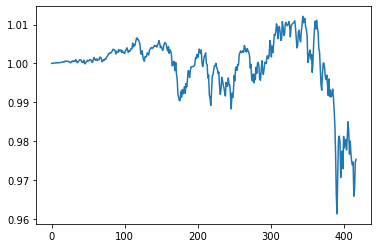

In [11]:
env = FinanceMultiStockEnv(if_train=False)

agent_rl = agent.AgentGaePPO  # PPO+GAE (on-policy)
net_dim = 2 ** 8
agent_ppo = agent_rl(net_dim, env.state_dim, env.action_dim)
agent_ppo.save_or_load_model('FinanceStock-v2_1.61_3', if_save=False)

import torch
cumulative_returns = env.draw_cumulative_return(agent_ppo, torch)

import matplotlib.pyplot as plt

plt.plot(cumulative_returns)
plt.show()